In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Population distribution

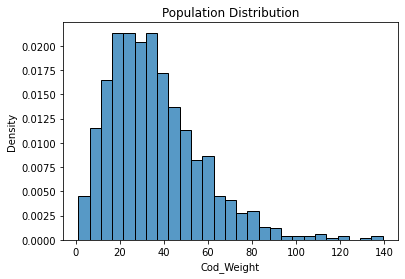

In [21]:
population = pd.read_csv("cod_population.csv")
population = population['Cod_Weight']

sns.histplot(population, stat = 'density')
plt.title("Population Distribution")
plt.show()

## Sampling distribution of the mean

In the example below, we take a sample size of 50 and calculate the mean. We do this 500 times and plot it to get a distribution of it.

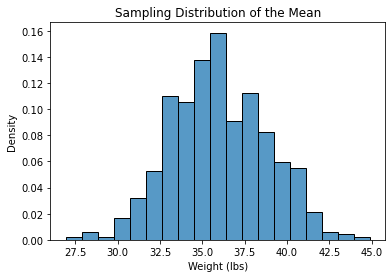

In [22]:
sample_size = 50
sample_means = []

for i in range(500):
  samp = np.random.choice(population, sample_size, replace = False)
  # calculate mean here
  this_sample_mean = np.mean(samp)
  # append here
  sample_means.append(this_sample_mean)

sns.histplot(sample_means,stat='density')
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

## Central Limit Theorem

The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. Using a sample size of n > 30 is usually a good rule of thumb, regardless of what the distribution of the population is like. If the distribution of the population is normal, the sample size can be smaller than that.

Looking at the `Sampling Distribution of the Mean` chart above, since we used a sample size of 50, the distribution should follow a normal distribution, even though the population is skewed right a little.

CLT describes this normal distribution quantitatively.

Population mean (μ) == Sample mean (x)

Sample standard deviation == Population standard deviation (σ) / sqrt(n)

where n is sample size and sufficiently large (e.g. > 30)

The standard deviation of a sampling distribution is also known as the standard error of the estimate of the mean.

## Biased vs Unbiased estimator

mean -> unbiased b/c the sampling distribution of the mean is equal to the mean of the population
max => biased

## Calculating probabilities

We can use the Cumulative Distribution Function

In [31]:
# Cod has an average weight of 36 lbs with a standard deviation of 20. We want to fit 25 cod fish into our crate that can hold up to 750 lbs. Calculate the probability that those 25 fish will fit.abs

std_dev = 20
mean = 36
samp_size = 25
x = 750 / samp_size

standard_error = std_dev / samp_size **.5

stats.norm.cdf(x, mean, standard_error)

0.06680720126885807

Only a 6.6% probability that the cod will have a mean weight of 750 / samp_size (i.e. 30) or less. Makes sense that it's a low probability, as 30 is way less than the mean of 36. They will most likely not fit.

## 95% confidence interval

By calculating the standard error, a data scientist use a nifty property of normal distributions: 95% of the normally distributed values are within about 1.96 standard deviations. So if the standard error is 1.275, then there is about a 95% probability that the observed sample mean of x is no more than 1.275 * 1.96 (e.g. dollars, height, etc) away from the population mean. This is referred to as a 95% confidence interval.

With only a single sample in hand, the data scientist can express the uncertainty in their sample mean fairly accurately. Pretty cool!